In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [377]:
data = pd.read_csv('aw_fb_data.csv')

In [378]:
data.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [379]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [380]:
data.shape

(6264, 19)

In [381]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X1                    6264 non-null   int64  
 1   age                   6264 non-null   int64  
 2   gender                6264 non-null   int64  
 3   height                6264 non-null   float64
 4   weight                6264 non-null   float64
 5   steps                 6264 non-null   float64
 6   hear_rate             6264 non-null   float64
 7   calories              6264 non-null   float64
 8   distance              6264 non-null   float64
 9   entropy_heart         6264 non-null   float64
 10  entropy_setps         6264 non-null   float64
 11  resting_heart         6264 non-null   float64
 12  corr_heart_steps      6264 non-null   float64
 13  norm_heart            6264 non-null   float64
 14  intensity_karvonen    6264 non-null   float64
 15  sd_norm_heart        

In [382]:
data.isnull().sum()

X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

In [383]:
data.columns

Index(['X1', 'age', 'gender', 'height', 'weight', 'steps', 'hear_rate',
       'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [384]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,6264.0,1771.144317,1097.988748,1.000000,789.750000,1720.000000,2759.250000,3670.000000
age,6264.0,29.158525,8.908978,18.000000,23.000000,28.000000,33.000000,56.000000
gender,6264.0,0.476533,0.499489,0.000000,0.000000,0.000000,1.000000,1.000000
height,6264.0,169.709052,10.324698,143.000000,160.000000,168.000000,180.000000,191.000000
weight,6264.0,69.614464,13.451878,43.000000,60.000000,68.000000,77.300000,115.000000
steps,6264.0,109.562268,222.797908,1.000000,5.159534,10.092029,105.847222,1714.000000
hear_rate,6264.0,86.142331,28.648385,2.222222,75.598079,77.267680,95.669118,194.333333
calories,6264.0,19.471823,27.309765,0.056269,0.735875,4.000000,20.500000,97.500000
distance,6264.0,13.832555,45.941437,0.000440,0.019135,0.181719,15.697188,335.000000
entropy_heart,6264.0,6.030314,0.765574,0.000000,6.108524,6.189825,6.247928,6.475733


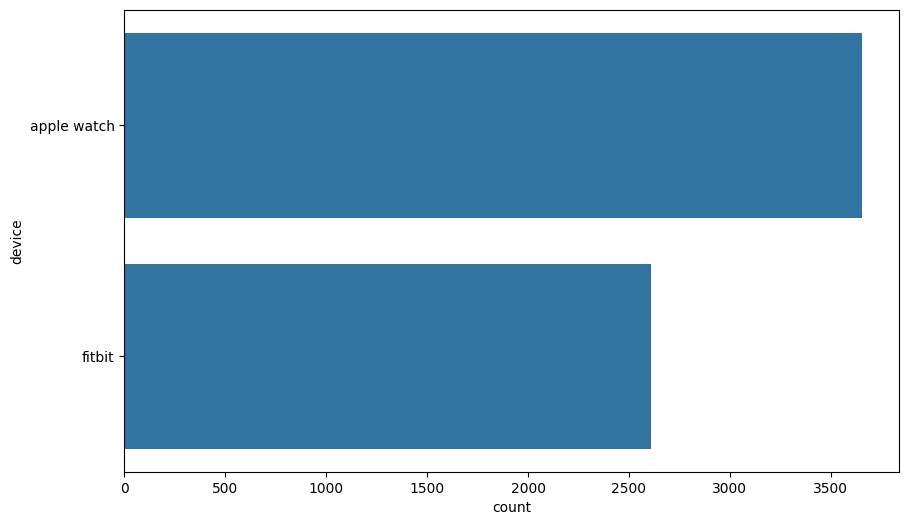

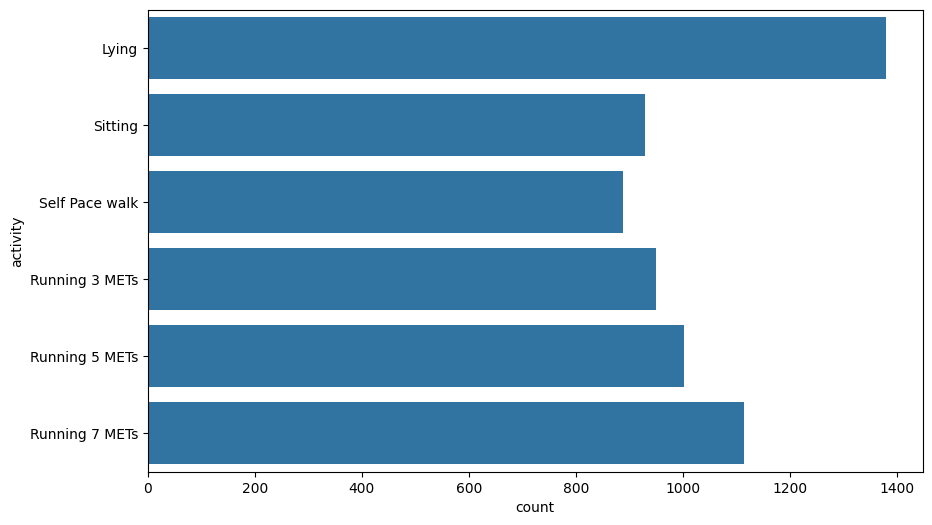

In [385]:
for col in data.select_dtypes('object'):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=data)

<Axes: xlabel='gender', ylabel='count'>

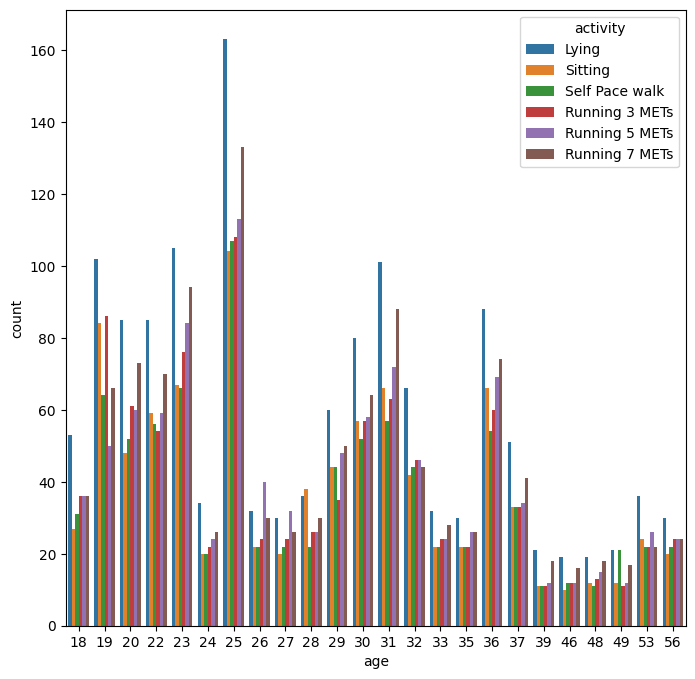

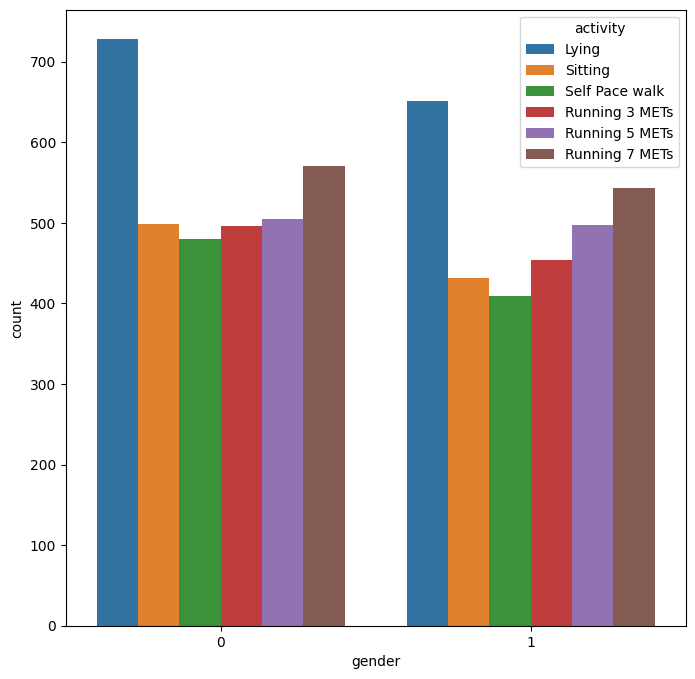

In [386]:
plt.subplots(1, 1, figsize=(8, 8))
sns.countplot(x='age', hue='activity', data=data)
plt.subplots(1, 1, figsize=(8, 8))
sns.countplot(x='gender', hue='activity', data=data)

In [387]:
data.sample(5)

,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
218,219,24,0,165.0,43.0,256.377778,153.363636,0.0610,0.004547,6.135030,6.189825,76.500000,1.000000,76.863636,0.643210,25.964975,1.165664,apple watch,Running 7 METs
1114,1115,27,1,176.0,81.8,136.625000,72.556350,8.4288,0.083985,6.266787,6.266787,55.955357,0.846517,16.600993,0.121136,9.484250,11.474451,apple watch,Sitting
730,731,26,1,182.0,74.0,558.277778,75.000000,7.8908,0.320527,6.385862,6.409391,74.648477,0.483657,0.351523,0.002945,5.329578,178.943225,apple watch,Running 7 METs
3452,3467,36,0,172.0,86.4,226.666667,78.615385,0.6100,0.102419,6.339850,6.055658,78.531302,-0.364394,0.084082,0.000797,14.419514,23.215074,apple watch,Lying
6262,3669,46,0,157.5,71.4,1.000000,35.000000,20.5000,1.000000,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


<Axes: xlabel='device', ylabel='activity'>

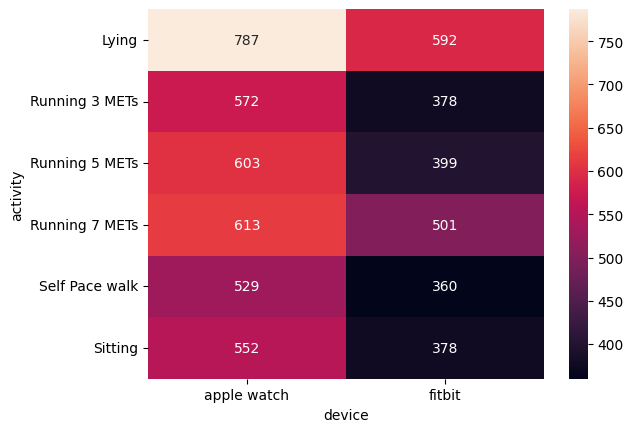

In [388]:
#pd_crosstab computes a simple cross-tabulation of two (or more) factors. By default computes a frequency table of the factors
sns.heatmap(pd.crosstab(data["activity"], data["device"]), annot=True , fmt='d')

In [389]:
data['activity'].value_counts()

activity
Lying             1379
Running 7 METs    1114
Running 5 METs    1002
Running 3 METs     950
Sitting            930
Self Pace walk     889
Name: count, dtype: int64

<Axes: >

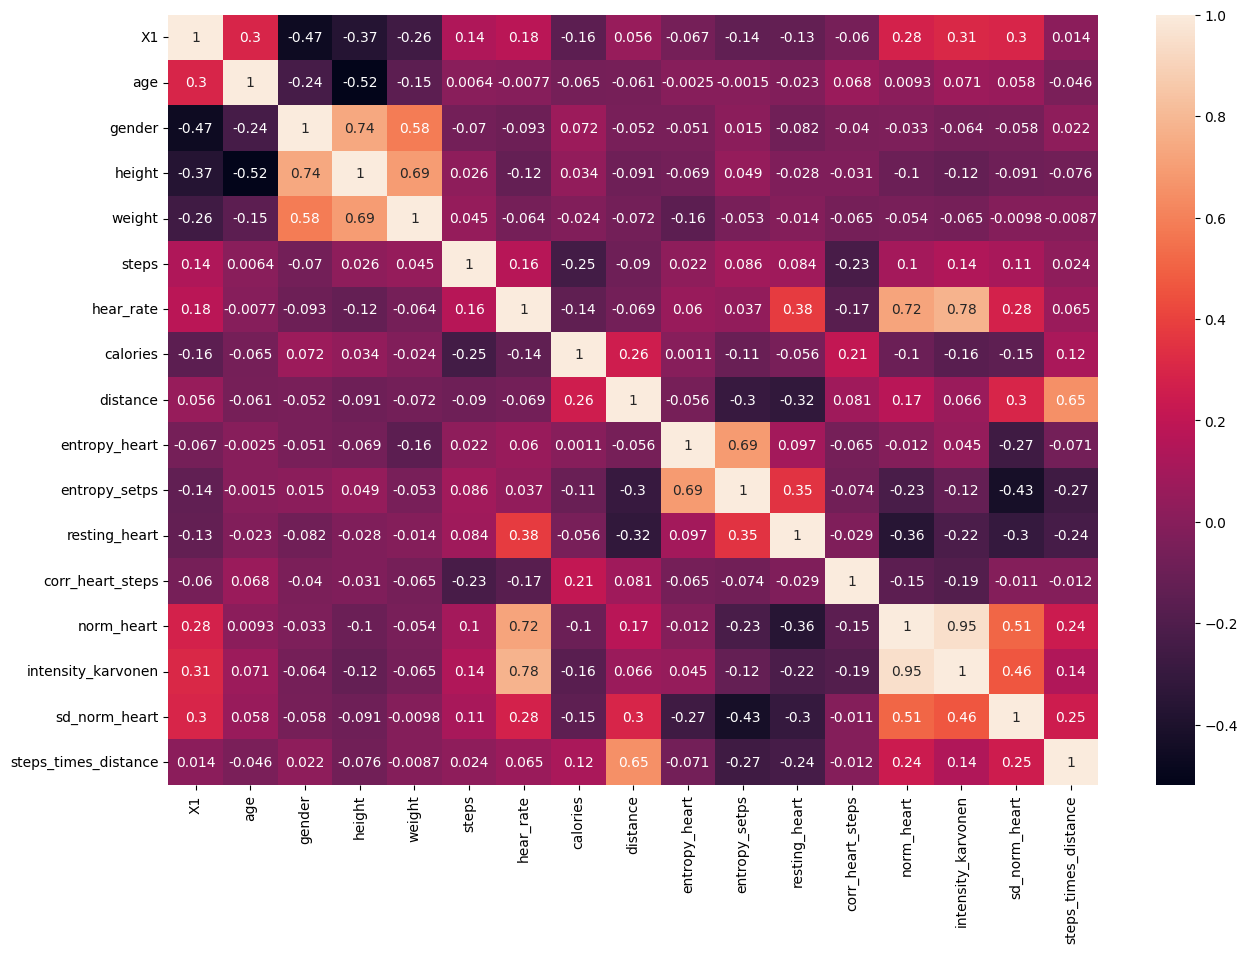

In [390]:
#iloc lets you select rows and columns by position (index)
#loc lets you select rows and columns by labels (column name)
plt.figure(figsize=(15, 10))
sns.heatmap(data.iloc[:, :-2].corr(), annot=True) 

In [391]:
data['device'].value_counts()

device
apple watch    3656
fitbit         2608
Name: count, dtype: int64

In [392]:
data.duplicated().sum()

0

**IF NO DATA IS REMOVED**

In [393]:
X_check = data.drop(['device'], axis=1)
X = data.drop(['activity'], axis=1)
y = data['activity']

In [394]:
X.head()

,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch


In [395]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [396]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5011, 18), (1253, 18), (5011,), (1253,))

/tmp/ipykernel_19133/1279294382.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/tmp/ipykernel_19133/1279294382.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/tmp/ipykernel_19133/1279294382.py:3: UserWarning: 

`distplot` is a deprecated function and will be remov

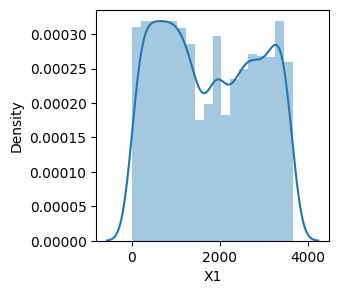

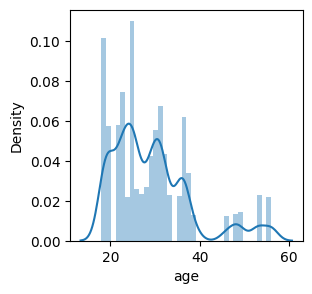

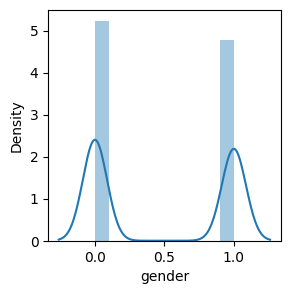

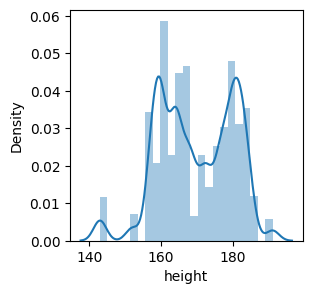

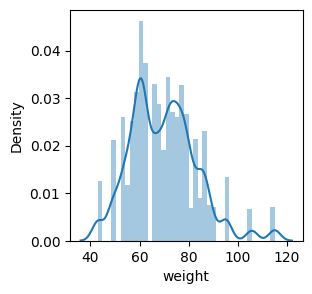

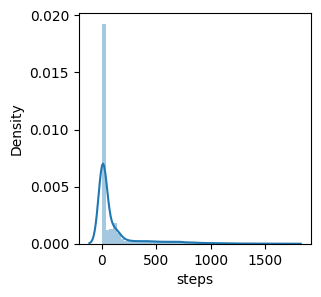

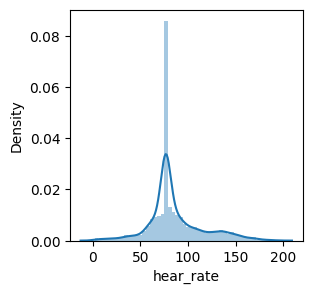

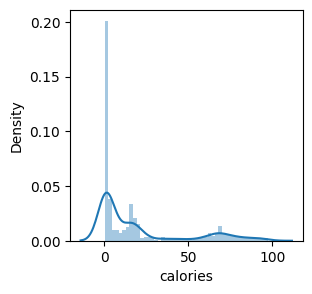

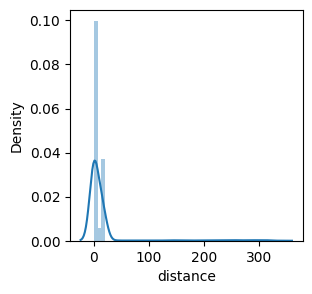

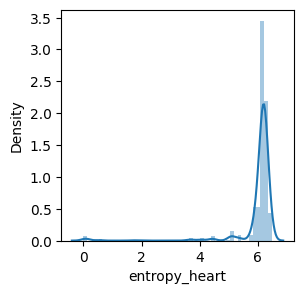

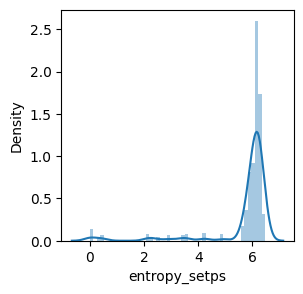

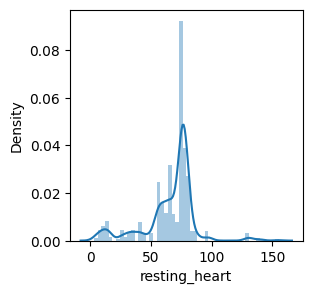

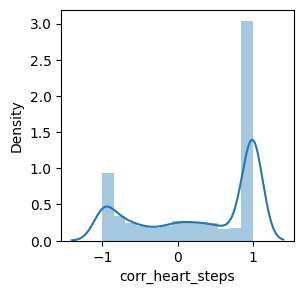

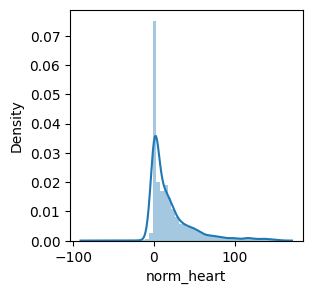

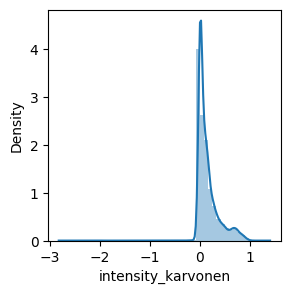

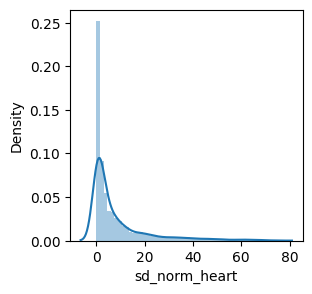

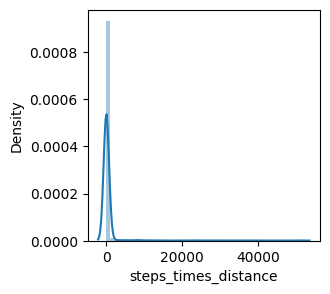

In [397]:
for(col) in data.select_dtypes(include='number'):
    plt.subplots(1, 1, figsize=(3,3))
    sns.distplot(data[col])

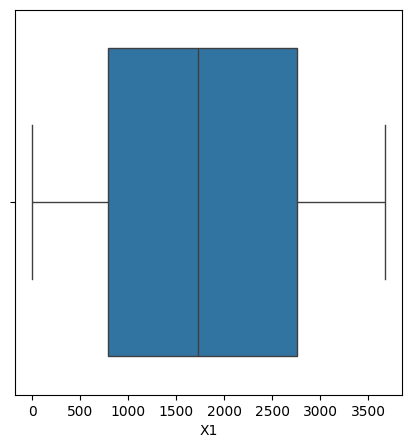

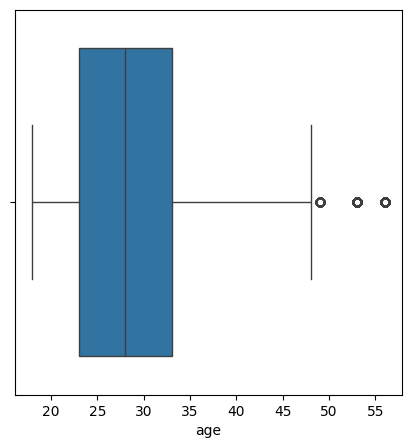

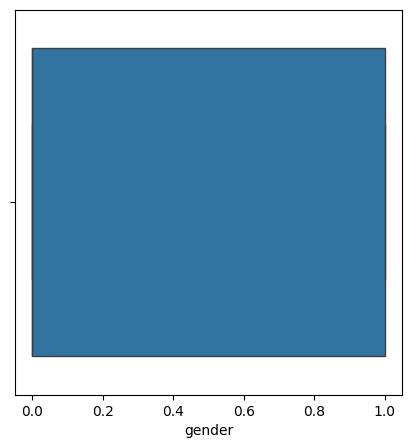

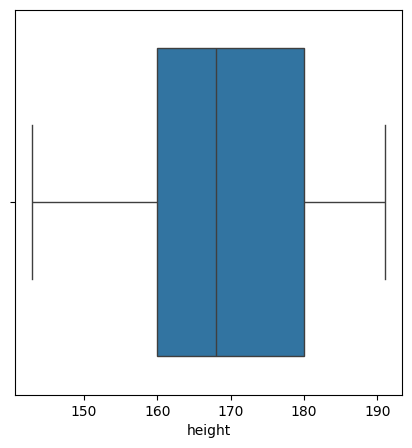

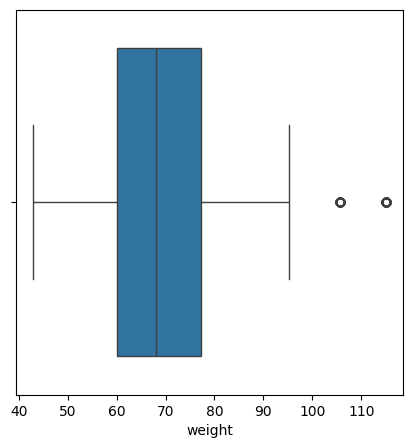

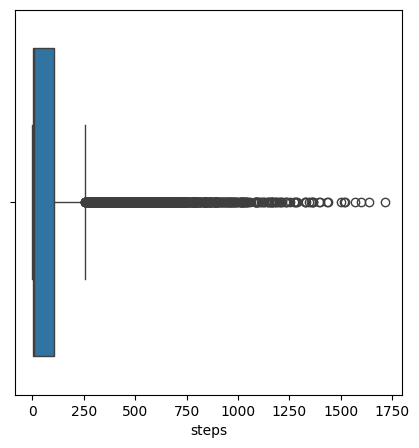

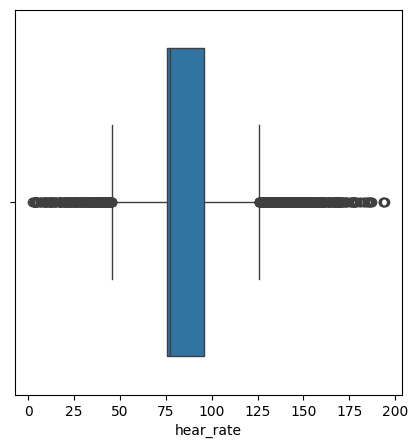

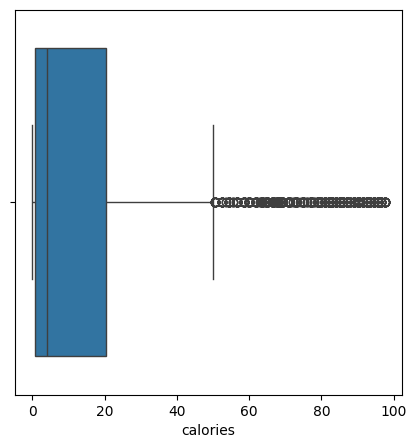

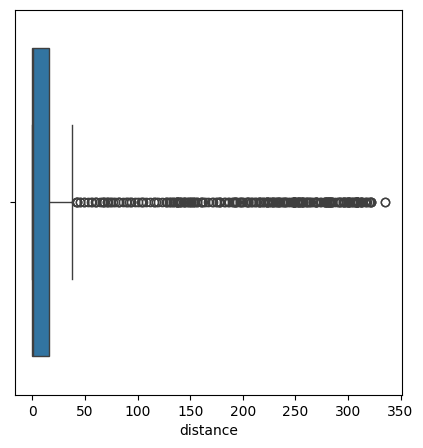

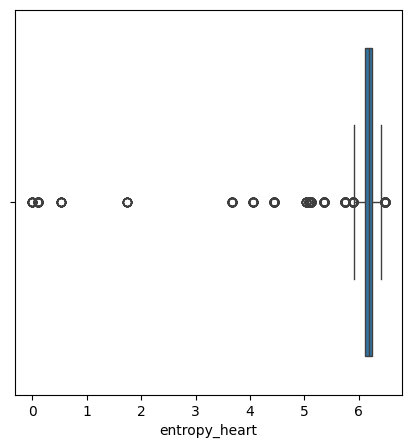

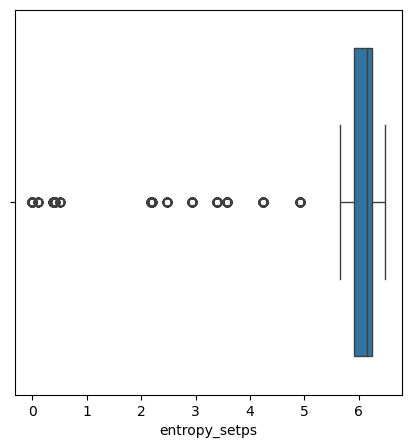

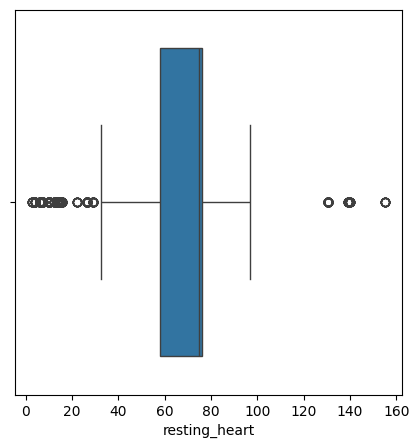

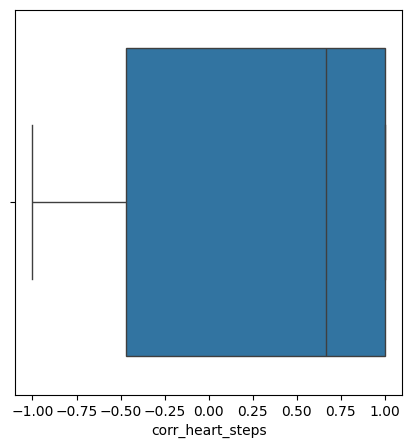

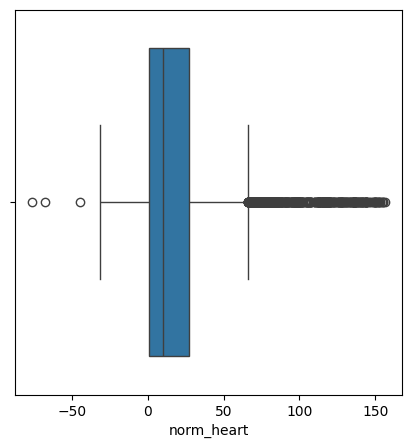

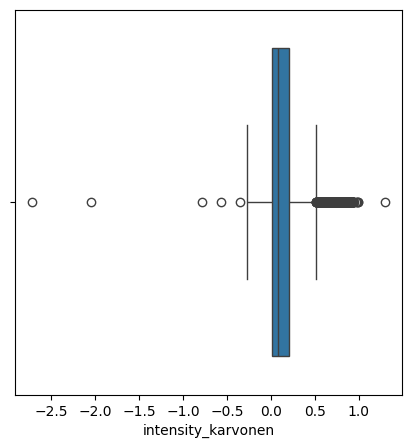

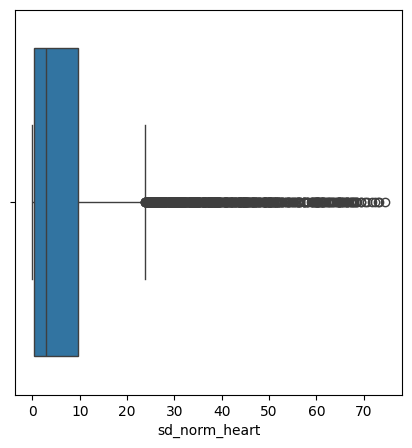

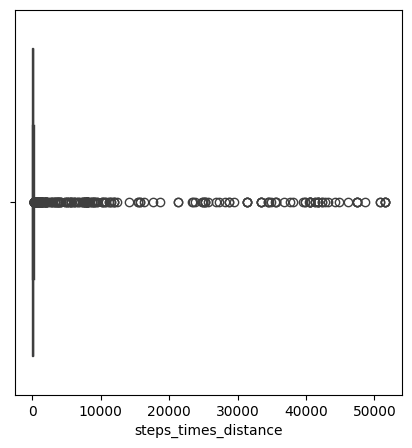

In [398]:
for(col) in data.select_dtypes(include='number'):
    plt.subplots(1, 1, figsize=(5, 5))
    sns.boxplot(x=data[col])


In [399]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [400]:
scaler = StandardScaler()
X_train.drop(['device'], axis=1, inplace=True)
X_test.drop(['device'], axis=1, inplace=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# scaler = MinMaxScaler()
# X_train.drop(['device'], axis=1, inplace=True)
# X_test.drop(['device'], axis=1, inplace=True)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [401]:
X_train[0]

array([ 0.36099317, -0.80412058,  1.05986088,  1.00751136,  1.05644375,
        0.15175068,  0.71554522, -0.68339764, -0.30199007, -1.18139129,
        0.2932258 , -0.73468407, -0.83801471,  1.27434036,  1.06071042,
        0.41125261, -0.14563758])

In [402]:
X_train_df = pd.DataFrame(X_train, columns=data.columns[:-2])
X_test_df = pd.DataFrame(X_test, columns=data.columns[:-2])

In [403]:
X_train_df

,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
0,0.360993,-0.804121,1.059861,1.007511,1.056444,0.151751,0.715545,-0.683398,-0.301990,-1.181391,0.293226,-0.734684,-0.838015,1.274340,1.060710,0.411253,-0.145638
1,0.874463,-0.804121,-0.943520,-0.151386,-0.556862,-0.383009,-0.854677,-0.637647,6.329877,-2.068299,-1.849493,-2.597065,0.478047,1.083313,0.544411,-0.384385,1.640964
2,0.241941,1.083157,-0.943520,0.331488,0.040658,-0.014519,-0.120636,-0.683142,-0.301778,0.089504,0.125161,0.370294,0.568181,-0.399632,-0.337569,-0.541807,-0.146030
3,-1.005837,-0.360055,1.059861,1.200661,0.339419,-0.452139,-0.314257,-0.637647,0.034451,0.497955,0.536677,0.464404,0.894644,-0.665957,-0.674198,-0.647174,-0.113047
4,1.622403,-0.027006,-0.943520,-1.020559,-1.079693,0.629589,1.156399,-0.688664,-0.303488,0.237798,0.191663,0.695010,0.813158,0.647995,0.916086,-0.389138,-0.147852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,-0.793178,0.639092,-0.943520,-0.923984,0.481330,-0.451397,0.319054,-0.624944,-0.303418,0.237798,0.378665,0.012343,-1.682947,0.313317,0.421884,0.380181,-0.148099
5007,0.169237,-1.137170,1.059861,1.007511,-0.504579,-0.452636,0.014211,-0.637647,-0.002757,0.336622,0.438688,0.639526,-1.682947,-0.465182,-0.455728,-0.401560,-0.117267
5008,-1.310284,-1.137170,-0.943520,0.234913,0.227384,-0.474498,-0.346435,-0.564505,0.035642,0.106470,0.298900,0.464115,0.894644,-0.698273,-0.711850,-0.645971,-0.131133
5009,-1.402072,0.306043,1.059861,1.007511,0.242322,-0.331241,-0.394948,-0.168310,-0.302987,0.186364,0.347425,-0.134394,-1.682947,-0.298527,-0.286223,-0.589767,-0.147881


In [404]:
X_train_df.isnull().sum()

X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
dtype: int64

In [405]:
y_train

array([3, 0, 4, ..., 0, 4, 2])

**LOGISTIC REGRESSION**

In [406]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.3200319233838787

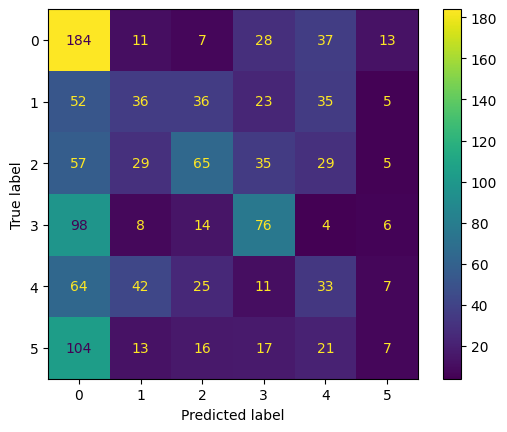

In [407]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matr = confusion_matrix(y_test, y_pred)  #actual, predicted
conf_matr_disp1 = ConfusionMatrixDisplay(conf_matr).plot()

**K-NN**

In [414]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.713487629688747

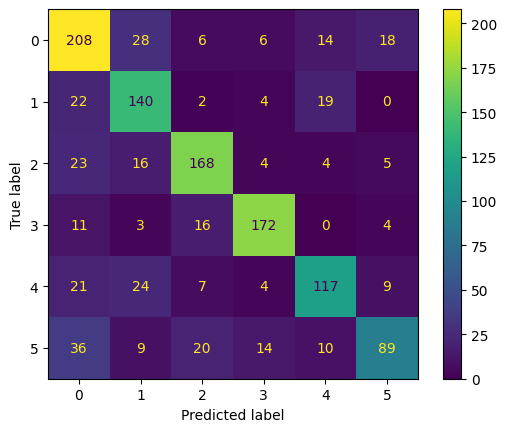

In [415]:
conf_matr = confusion_matrix(y_test, y_pred_knn)  #actual, predicted
conf_matr_disp1 = ConfusionMatrixDisplay(conf_matr).plot()

**SVM**

In [409]:
from sklearn.svm import SVC, LinearSVC
svc_model_linear = SVC(kernel='linear')
svc_model_linear.fit(X_train, y_train)
y_pred_svc_linear = svc_model_linear.predict(X_test)

svc_model_rbf = SVC(kernel='rbf')
svc_model_rbf.fit(X_train, y_train)
y_pred_svc_rbf = svc_model_rbf.predict(X_test)

svc_lin_clf = LinearSVC(dual="auto")
svc_lin_clf.fit(X_train, y_train)
y_pred_svc_lin_clf = svc_lin_clf.predict(X_test)

svc_model_sigmoid = SVC(kernel='sigmoid')
svc_model_sigmoid.fit(X_train, y_train)
y_pred_svc_sigmoid = svc_model_sigmoid.predict(X_test)

svc_model_poly = SVC(kernel='poly', degree=4)
svc_model_poly.fit(X_train, y_train)
y_pred_svc_poly = svc_model_poly.predict(X_test)


print(accuracy_score(y_test, y_pred_svc_linear))
print(accuracy_score(y_test, y_pred_svc_rbf))
print(accuracy_score(y_test, y_pred_svc_lin_clf))
print(accuracy_score(y_test, y_pred_svc_sigmoid))
print(accuracy_score(y_test, y_pred_svc_poly))

0.3423782920989625
0.4788507581803671
0.31683958499600956
0.20909816440542697
0.42857142857142855


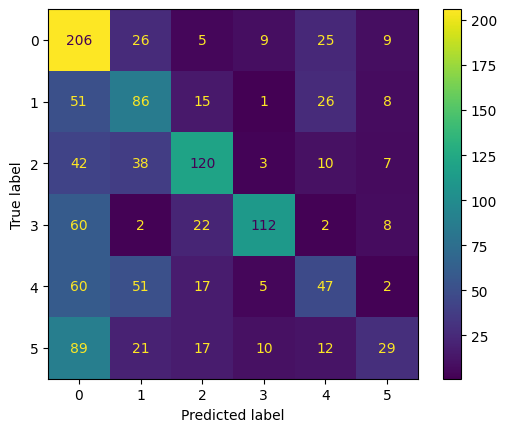

In [416]:
conf_matr = confusion_matrix(y_test, y_pred_svc_rbf)  #actual, predicted
conf_matr_disp1 = ConfusionMatrixDisplay(conf_matr).plot()

**DECISION TREES**

In [425]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.7869114126097366

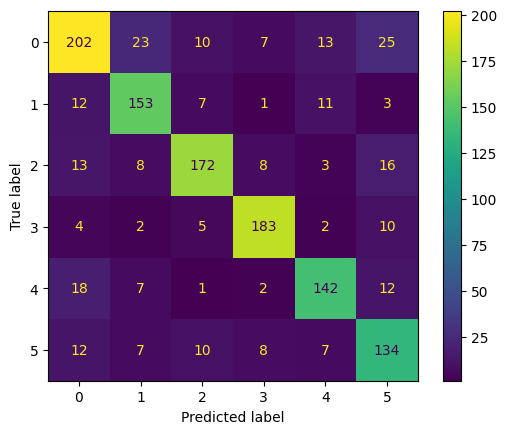

In [426]:
conf_matr = confusion_matrix(y_test, y_pred_dt)  #actual, predicted
conf_matr_disp1 = ConfusionMatrixDisplay(conf_matr).plot()

**RANDOM FOREST**

In [430]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_model_gini = RandomForestClassifier(n_estimators=100, criterion='gini')
rf_model_gini.fit(X_train, y_train)
y_pred_rf_gini = rf_model_gini.predict(X_test)

rf_model_logloss = RandomForestClassifier(n_estimators=100, criterion='log_loss')
rf_model_logloss.fit(X_train, y_train)
y_pred_rf_logloss = rf_model_logloss.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf_gini))
print(accuracy_score(y_test, y_pred_rf_logloss))


0.8842777334397446
0.8914604948124502
0.8842777334397446


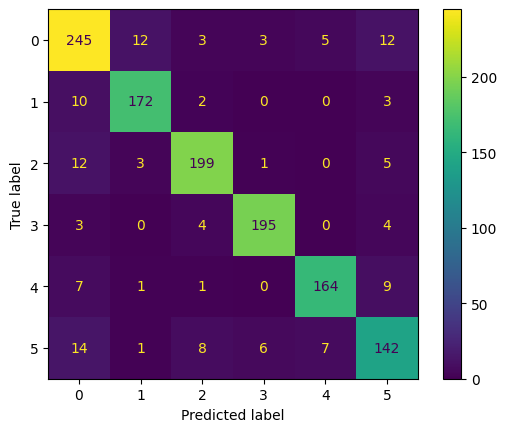

In [431]:
conf_matr = confusion_matrix(y_test, y_pred_rf_gini)  #actual, predicted
conf_matr_disp1 = ConfusionMatrixDisplay(conf_matr).plot()

**VOTING CLASSIFIER**

In [445]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[('lr', model), ('knn', knn_model), ('svc', svc_model_rbf), ('dt', dt_model), ('rf', rf_model)], voting='hard') #hard voting = majority of the votes is taken
#soft voting = each classifier assigns a probability to each class label and the class with total highest probability is the output
voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)
print(accuracy_score(y_test, y_pred_voting))
#we can remove the models and check how the voting classifier performs

0.7557861133280128


**AVERAGING ENSEMBLE METHOD**

In [454]:
y_lr_proba_av = model.predict_proba(X_test)
y_dec_tree_proba_av = dt_model.predict_proba(X_test)
y_random_forest_proba_av = rf_model.predict_proba(X_test)
y_knn_proba_av = knn_model.predict_proba(X_test)
#y_svc_proba_av = svc_model_rbf.predict_proba(X_test) --> for this, when declaring SVC() model, we need to add probability=True
y_final_proba_av = (0.05*y_lr_proba_av + 0.25*y_dec_tree_proba_av + 0.5*y_random_forest_proba_av + 0.2*y_knn_proba_av)/4
print(y_final_proba_av)

[[0.01756882 0.00163642 0.0006133  0.00123429 0.00254387 0.2264033 ]
 [0.20515747 0.00120265 0.00070247 0.01443629 0.00092115 0.02757997]
 [0.01563108 0.00204419 0.01376514 0.00249421 0.20151821 0.01454717]
 ...
 [0.1863729  0.01785824 0.00229186 0.00094471 0.02515353 0.01737876]
 [0.12793439 0.00477218 0.10658374 0.0033265  0.00359648 0.00378671]
 [0.0073815  0.002707   0.05384899 0.07526677 0.06528122 0.04551452]]


**WEIGHTED AVERAGE ENSEMBLE METHOD**

In [ ]:
y_lr_proba = model.predict_proba(X_test)
y_dec_tree_proba = dt_model.predict_proba(X_test)
y_random_forest_proba = rf_model.predict_proba(X_test)
y_knn_proba = knn_model.predict_proba(X_test)
#y_svc_proba = svc_model_rbf.predict_proba(X_test) --> for this, when declaring SVC() model, we need to add probability=True
y_final_proba = (y_lr_proba + y_dec_tree_proba + y_random_forest_proba + y_knn_proba)/4
print(y_final_proba)

**WITH FEATURE SELECTION**

In [346]:
X_train_df.drop(['X1', 'corr_heart_steps', 'entropy_setps', 'steps_times_distance', 'entropy_heart', 'sd_norm_heart', 'hear_rate'], axis=1, inplace=True)
X_test_df.drop(['X1', 'corr_heart_steps', 'entropy_setps', 'steps_times_distance', 'entropy_heart', 'sd_norm_heart', 'hear_rate'], axis=1, inplace=True)

In [347]:
X_train_df.to_numpy()
X_test_df.to_numpy()

array([[-0.47107163, -0.94352006, -0.92398411, ...,  0.46368864,
        -0.66441511, -0.67297838],
       [-0.69310426,  1.05986088,  1.10408613, ...,  0.46368864,
        -0.72072647, -0.7358057 ],
       [-0.58208795, -0.94352006, -0.44111024, ...,  0.46391215,
        -0.67185625, -0.68171543],
       ...,
       [-1.02615321,  1.05986088,  1.39381045, ...,  0.48571145,
        -0.50844094, -0.50739966],
       [-1.13716953,  1.05986088,  1.29723568, ..., -1.47452861,
        -0.62405539, -0.65788581],
       [-0.02700636, -0.94352006, -1.02055888, ..., -2.60225282,
         4.18659031,  2.87738158]])

**LOGISTIC REGRESSION**

In [348]:
model = LogisticRegression()
model.fit(X_train_df, y_train)
y_pred = model.predict(X_test_df)
accuracy_score(y_test, y_pred)

0.3040702314445331

**SVM**

In [349]:
svc_model_linear = SVC(kernel='linear')
svc_model_linear.fit(X_train_df, y_train)
y_pred_svc_linear = svc_model_linear.predict(X_test_df)

svc_model_rbf = SVC(kernel='rbf')
svc_model_rbf.fit(X_train_df, y_train)
y_pred_svc_rbf = svc_model_rbf.predict(X_test_df)

svc_lin_clf = LinearSVC(dual="auto")
svc_lin_clf.fit(X_train_df, y_train)
y_pred_svc_lin_clf = svc_lin_clf.predict(X_test_df)

svc_model_sigmoid = SVC(kernel='sigmoid')
svc_model_sigmoid.fit(X_train_df, y_train)
y_pred_svc_sigmoid = svc_model_sigmoid.predict(X_test_df)

svc_model_poly = SVC(kernel='poly', degree=4)
svc_model_poly.fit(X_train_df, y_train)
y_pred_svc_poly = svc_model_poly.predict(X_test_df)


print(accuracy_score(y_test, y_pred_svc_linear))
print(accuracy_score(y_test, y_pred_svc_rbf))
print(accuracy_score(y_test, y_pred_svc_lin_clf))
print(accuracy_score(y_test, y_pred_svc_sigmoid))
print(accuracy_score(y_test, y_pred_svc_poly))

0.3112529928172386
0.41819632881085395
0.30965682362330404
0.19952114924181963
0.4022346368715084


**K-NN**

In [350]:
knn_model = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2,) #p=2 is equivalent to Euclidean distance, metric='minkowski' is the default which represents the euclidean distance metric to use for the knn classifier
knn_model.fit(X_train_df, y_train)
y_pred_knn = knn_model.predict(X_test_df)
accuracy_score(y_test, y_pred_knn)

0.6823623304070231

**DECISION TREES**

In [351]:
dt_model = DecisionTreeClassifier(criterion= 'entropy')
dt_model.fit(X_train_df, y_train)
y_pred_dt = dt_model.predict(X_test_df)
accuracy_score(y_test, y_pred_dt)

0.75658419792498

**RANDOM FOREST**

In [353]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train_df, y_train)
y_pred_rf = rf_model.predict(X_test_df)

accuracy_score(y_test, y_pred_rf)

0.8212290502793296